In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('/content/application_train.csv')
df2 = pd.read_csv('/content/previous_application.csv')

In [3]:
cols_to_drop = [
    # Mssing Value > 30%
    'COMMONAREA_AVG',
    'COMMONAREA_MODE',
    'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAPARTMENTS_MODE',
    'FONDKAPREMONT_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAPARTMENTS_AVG',
    'FLOORSMIN_MODE',
    'FLOORSMIN_MEDI',
    'FLOORSMIN_AVG',
    'YEARS_BUILD_AVG',
    'YEARS_BUILD_MEDI',
    'YEARS_BUILD_MODE',
    'OWN_CAR_AGE',
    'LANDAREA_MEDI',
    'LANDAREA_MODE',
    'LANDAREA_AVG',
    'BASEMENTAREA_AVG',
    'BASEMENTAREA_MEDI',
    'BASEMENTAREA_MODE',
    'EXT_SOURCE_1',
    'NONLIVINGAREA_MODE',
    'NONLIVINGAREA_MEDI',
    'NONLIVINGAREA_AVG',
    'ELEVATORS_MODE',
    'ELEVATORS_AVG',
    'ELEVATORS_MEDI',
    'WALLSMATERIAL_MODE',
    'APARTMENTS_MEDI',
    'APARTMENTS_AVG',
    'APARTMENTS_MODE',
    'ENTRANCES_MEDI',
    'ENTRANCES_AVG',
    'ENTRANCES_MODE',
    'LIVINGAREA_AVG',
    'LIVINGAREA_MEDI',
    'LIVINGAREA_MODE',
    'HOUSETYPE_MODE',
    'FLOORSMAX_AVG',
    'FLOORSMAX_MEDI',
    'FLOORSMAX_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BEGINEXPLUATATION_AVG',
    'TOTALAREA_MODE',
    'EMERGENCYSTATE_MODE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'DAYS_LAST_PHONE_CHANGE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'LIVE_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_REGION_NOT_LIVE_REGION',    
    'REG_REGION_NOT_WORK_REGION',   
    'LIVE_REGION_NOT_WORK_REGION',   
    'REG_CITY_NOT_LIVE_CITY',
    'DAYS_BIRTH',
    'DAYS_ID_PUBLISH',
    'DAYS_REGISTRATION',
    'DAYS_EMPLOYED',
    'FLAG_CONT_MOBILE',
    'FLAG_MOBIL'
]
df1.drop(columns=cols_to_drop, axis=1,inplace=True)

In [4]:
cols_to_drop = [
    'RATE_INTEREST_PRIMARY',
    'RATE_INTEREST_PRIVILEGED',
    'AMT_DOWN_PAYMENT',
    'NAME_TYPE_SUITE',
    'RATE_DOWN_PAYMENT',
    'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE',
    'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
    'NAME_CONTRACT_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'FLAG_LAST_APPL_PER_CONTRACT',
    'NFLAG_LAST_APPL_IN_DAY'
]
df2.drop(columns=cols_to_drop, inplace=True)

In [5]:
corr_matrix2 = df2.corr().abs()
upper = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
df2.drop(columns=to_drop_hicorr, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [6]:
corr_matrix1 = df1.corr().abs()
upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
df1.drop(columns=to_drop_hicorr, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
df1['Income_Range'] = pd.qcut(df1['AMT_INCOME_TOTAL'], 10)
df1['Credit_Range'] = pd.qcut(df1['AMT_CREDIT'], 10)

In [8]:
telat = df1[df1['TARGET'] == 1]
top_income_credit_range = pd.crosstab(index=telat["Credit_Range"], 
                          columns=telat["Income_Range"]).head()
top_income_credit_range

Income_Range,"(25649.999, 81000.0]","(81000.0, 99000.0]","(99000.0, 112500.0]","(112500.0, 135000.0]","(135000.0, 147150.0]","(147150.0, 162000.0]","(162000.0, 180000.0]","(180000.0, 225000.0]","(225000.0, 270000.0]","(270000.0, 117000000.0]"
Credit_Range,,,,,,,,,,
"(44999.999, 180000.0]",604,344,386,369,30,159,128,142,34,36
"(180000.0, 254700.0]",465,380,401,409,30,229,205,218,66,64
"(254700.0, 306306.0]",344,325,367,430,33,227,174,220,71,57
"(306306.0, 432000.0]",437,368,498,606,52,325,256,323,114,102
"(432000.0, 513531.0]",246,278,354,528,47,391,333,450,183,146


In [9]:
m1 = pd.merge(df1, df2, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
m1_mismatches = m1[m1['SK_ID_CURR'].isna()].dropna(axis=1)
m1_matches = m1[~m1['SK_ID_CURR'].isna()]

m2 = pd.merge(m1_mismatches, df2, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
df = pd.concat([m1_matches, m2]).drop(columns='SK_ID_CURR').reset_index(drop=True)

In [10]:
lancar = df[df['TARGET'] == 0]
top_client_type = pd.crosstab(index=lancar["NAME_CONTRACT_STATUS"], 
                          columns=lancar["NAME_CLIENT_TYPE"])
top_client_type

NAME_CLIENT_TYPE,New,Refreshed,Repeater,XNA
NAME_CONTRACT_STATUS,,,,
Approved,221012,77490,519950,404
Canceled,2496,14798,217629,718
Refused,10987,11065,193658,242
Unused offer,1700,3151,16015,26


In [11]:
cols_to_drop = [
    'SK_ID_PREV_x',
    'NAME_CASH_LOAN_PURPOSE_x',
    'NAME_CONTRACT_STATUS_x',
    'DAYS_DECISION_x',
    'NAME_PAYMENT_TYPE_x',
    'CODE_REJECT_REASON_x',
    'NAME_CLIENT_TYPE_x',
    'NAME_GOODS_CATEGORY_x',
    'NAME_PORTFOLIO_x',
    'NAME_PRODUCT_TYPE_x',
    'CHANNEL_TYPE_x',
    'SELLERPLACE_AREA_x',
    'NAME_SELLER_INDUSTRY_x',      
    'CNT_PAYMENT_x',                
    'NAME_YIELD_GROUP_x',         
    'PRODUCT_COMBINATION_x',        
    'SK_ID_PREV_y',                
    'NAME_CASH_LOAN_PURPOSE_y',   
    'NAME_CONTRACT_STATUS_y',      
    'DAYS_DECISION_y',             
    'NAME_PAYMENT_TYPE_y',        
    'CODE_REJECT_REASON_y',     
    'NAME_CLIENT_TYPE_y',         
    'NAME_GOODS_CATEGORY_y',       
    'NAME_PORTFOLIO_y',            
    'NAME_PRODUCT_TYPE_y',          
    'CHANNEL_TYPE_y',            
    'SELLERPLACE_AREA_y',        
    'NAME_SELLER_INDUSTRY_y',     
    'CNT_PAYMENT_y',              
    'NAME_YIELD_GROUP_y',        
    'PRODUCT_COMBINATION_y',
    'SK_ID_PREV',
    'NAME_CONTRACT_TYPE',
    'NAME_TYPE_SUITE',
    'NAME_HOUSING_TYPE',
    'CODE_REJECT_REASON',
    'OCCUPATION_TYPE', 
    'Credit_Range',
    'Income_Range',
]

df.drop(columns=cols_to_drop, inplace=True)

In [12]:
cols_to_drop = [
    'AMT_APPLICATION_y',
    'AMT_APPLICATION_x',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'PRODUCT_COMBINATION',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'NAME_GOODS_CATEGORY',
    'NAME_SELLER_INDUSTRY',
    'DAYS_DECISION',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'HOUR_APPR_PROCESS_START',
    'WEEKDAY_APPR_PROCESS_START',
    'WEEKDAY_APPR_PROCESS_START',
    'SELLERPLACE_AREA',
    'DEF_30_CNT_SOCIAL_CIRCLE'
]

df.drop(columns=cols_to_drop, inplace=True)

In [13]:

df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].str.replace('Secondary / secondary special', 'secondary special')
df['NAME_CASH_LOAN_PURPOSE'] = df['NAME_CASH_LOAN_PURPOSE'].str.replace('Wedding / gift / holiday', 'Wedding', regex=False)
df['NAME_CASH_LOAN_PURPOSE'] = df['NAME_CASH_LOAN_PURPOSE'].str.replace('Buying a holiday home / land', 'Buying a holiday home', regex=False)
df['NAME_YIELD_GROUP'] = df['NAME_YIELD_GROUP'].str.replace('low_normal', 'low normal', regex=False)
df['NAME_YIELD_GROUP'] = df['NAME_YIELD_GROUP'].str.replace('low_action', 'low action', regex=False)
df['NAME_CASH_LOAN_PURPOSE'] = df['NAME_CASH_LOAN_PURPOSE'].str.replace('gasification / water supply', 'gasification', regex=False)
df['NAME_PAYMENT_TYPE'] = df['NAME_PAYMENT_TYPE'].str.replace('non-cash from your account', 'non cash from your account', regex=False)
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].str.replace('single / not married', 'single', regex=False)

for col in df.select_dtypes(include='object').columns.tolist():
    df[col] = df[col].str.lower()

In [14]:
df['CNT_PAYMENT'].fillna(df['CNT_PAYMENT'].mean(), inplace=True)
df['NAME_PORTFOLIO'].fillna(df['NAME_PORTFOLIO'].mode(), inplace=True)
df['NAME_YIELD_GROUP'].fillna(df['NAME_YIELD_GROUP'].mode(), inplace=True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)

cols_to_drop = ['NAME_PAYMENT_TYPE', 
                'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE']

df.dropna(subset=cols_to_drop, inplace=True)

In [15]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['TARGET']]

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

data_model = pd.concat([onehot, std, df[['TARGET']]], axis=1)
data_model.dropna(inplace=True)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logreg

In [ ]:
logreg = LogisticRegression()
c_space = np.logspace(-3, 3, 5)
param_grid = {'C': c_space}

logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=3)
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])})

In [ ]:
y_pred_proba = logreg_cv.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

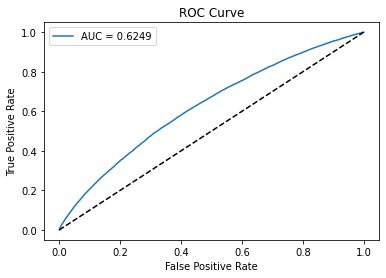

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.1819')

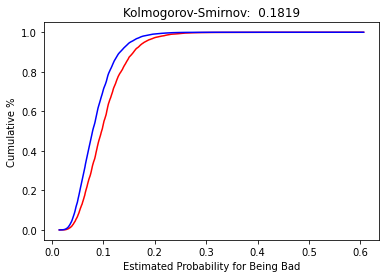

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Random Forest

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores q
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred_proba = rf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

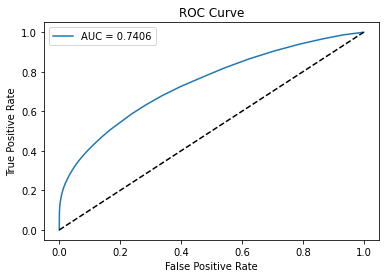

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [21]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3492')

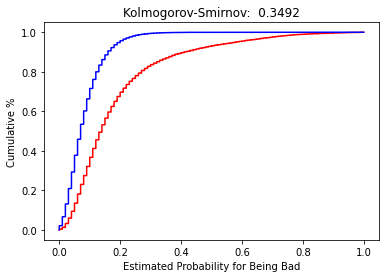

In [22]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

XGBOost

In [ ]:
import xgboost as xgb

In [ ]:
parameters_xgb = {
    'learning_rate': (0.1,0.01,0.05,0.5,0.3,1),
    'n_estimators': (100,200),
    'max_depth':(5,10,20),}
xg_clf = xgb.XGBClassifier()
# xgb_clf_gv = RandomizedSearchCV(xg_clf,parameters_xgb,cv=3)  # using cross validation with best hyperparameters
xgb_clf_op = xg_clf.fit(X_train,y_train)

In [ ]:
y_pred_proba = xgb_clf_op.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

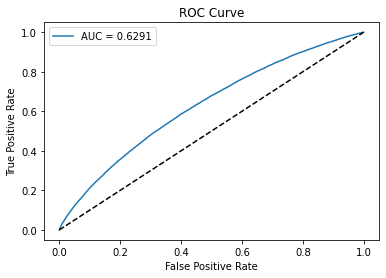

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.1864')

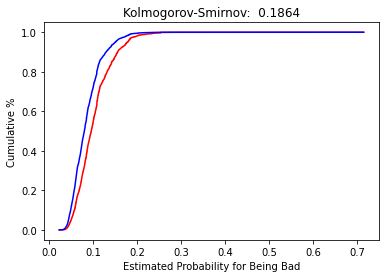

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)